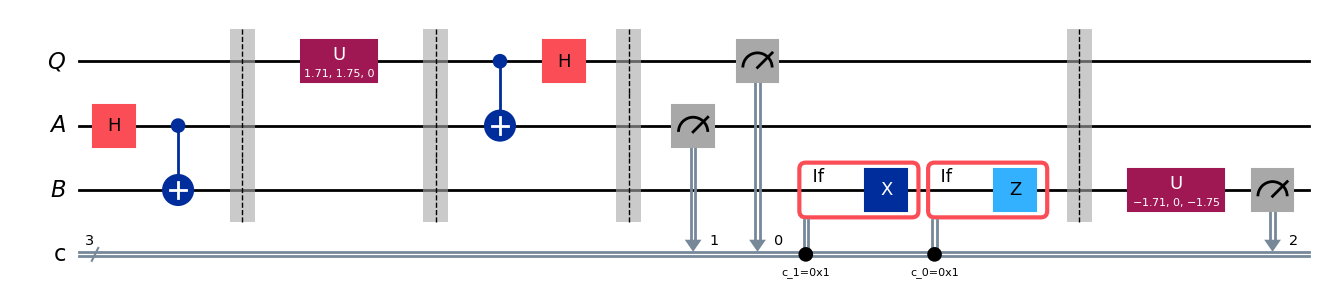

In [1]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np
 
secret = QuantumRegister(1, "Q")
Alice = QuantumRegister(1, "A")
Bob = QuantumRegister(1, "B")
 
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(secret, Alice, Bob, cr)

# Criação do par EPR
qc.h(Alice)
qc.cx(Alice, Bob)
 
qc.barrier()

# Geração de um estado arbitrário
np.random.seed(100)
theta = np.random.uniform(0.0, 1.0) * np.pi  # [0, pi]
varphi = np.random.uniform(0.0, 2.0) * np.pi  # [0 2*pi]
 
qc.u(theta, varphi, 0.0, secret)

qc.barrier()
 
qc.cx(secret, Alice)
qc.h(secret)

qc.barrier()

qc.measure(Alice, cr[1])
qc.measure(secret, cr[0])
 
with qc.if_test((cr[1], 1)):
    qc.x(Bob)
with qc.if_test((cr[0], 1)):
    qc.z(Bob)

qc.barrier()
 
qc.u(theta, varphi, 0.0, Bob).inverse()
qc.measure(Bob, cr[2])
 
qc.draw(output="mpl")

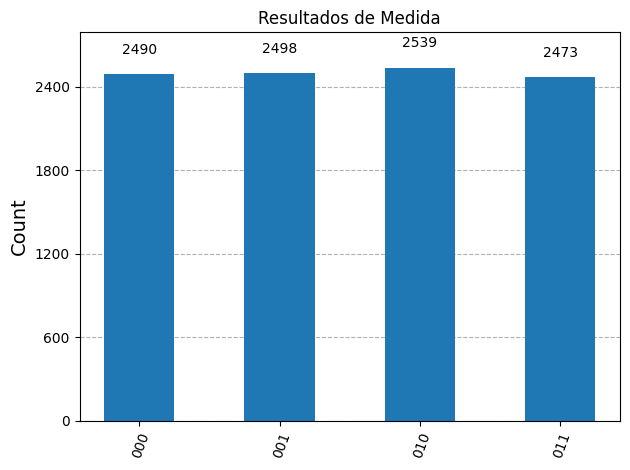

In [2]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
qc = transpile(qc, simulator)

result = simulator.run(qc, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Resultados de Medida')